In [19]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [20]:
# data = pd.read_csv('sample_data/Job_Placement_Data.csv')
# prediktor = ['hsc_subject','undergrad_degree','work_experience']
# prediktor_dummies = pd.get_dummies(data[prediktor], prefix=['hsc_subject','undergrad_degree','work_experience'])
# t = ['ssc_percentage']
# X = data [prediktor_dummies]
# y = data ["status"]
data = pd.read_csv("sample_data/Job_Placement_Data.csv")
X = data.loc[:,('hsc_subject','undergrad_degree','work_experience')]
X = pd.get_dummies(X, prefix=('hsc_subject','undergrad_degree','work_experience'), columns=['hsc_subject','undergrad_degree','work_experience'])
y = data["status"]
print("Label kelas : ", np.unique(y))

Label kelas :  ['Not Placed' 'Placed']


In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[-0.23221018  0.95008151 -0.85666269 -1.43924583 -0.23221018  1.62605898
   0.72444647 -0.72444647]
 [-0.23221018 -1.05254128  1.16732059 -1.43924583 -0.23221018  1.62605898
  -1.38036423  1.38036423]
 [ 4.30644338 -1.05254128 -0.85666269  0.69480833 -0.23221018 -0.61498384
   0.72444647 -0.72444647]
 [-0.23221018 -1.05254128  1.16732059 -1.43924583 -0.23221018  1.62605898
   0.72444647 -0.72444647]
 [-0.23221018  0.95008151 -0.85666269  0.69480833 -0.23221018 -0.61498384
   0.72444647 -0.72444647]]


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[-0.23221018 -1.05254128  1.16732059 -1.43924583 -0.23221018  1.62605898
   0.72444647 -0.72444647]
 [-0.23221018  0.95008151 -0.85666269  0.69480833 -0.23221018 -0.61498384
   0.72444647 -0.72444647]
 [-0.23221018 -1.05254128  1.16732059 -1.43924583 -0.23221018  1.62605898
   0.72444647 -0.72444647]
 [-0.23221018  0.95008151 -0.85666269  0.69480833 -0.23221018 -0.61498384
   0.72444647 -0.72444647]
 [-0.23221018 -1.05254128  1.16732059  0.69480833 -0.23221018 -0.61498384
  -1.38036423  1.38036423]]
y Training: 111    Not Placed
159    Not Placed
24         Placed
30         Placed
60         Placed
Name: status, dtype: object


In [23]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', C=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [24]:
print("Koefisien model : ", clf_svc.coef_)
print("Bias model : ", clf_svc.intercept_)
print("Indeks Support Vector : ", clf_svc.support_)
print("Support vector : ", clf_svc.support_vectors_)
print("Jumlah support vector: ",clf_svc.n_support_)
print("Nilai alpha : ", np.abs(clf_svc.dual_coef_))

Koefisien model :  [[ 8.62389668e-06  1.33931676e-05 -1.73817937e-05  9.73154147e-02
  -3.94886184e-01  9.27880177e-02  6.15949984e-08 -6.15949993e-08]]
Bias model :  [0.89767742]
Indeks Support Vector :  [  0   1   6   9  12  13  15  16  22  25  27  30  35  41  42  46  47  49
  59  61  67  71  72  75  76  80  81  87  89  90  91  92  94  95 102 107
 110 112 116 118 119 120 121 127 128 139 140 142   8  19  21  32  33  34
  40  43  45  50  51  52  53  54  55  57  62  66  68  70  77  78  79  85
  86  96  98  99 104 105 106 108 109 111 115 122 123 125 130 131 133 134
 137 138 141 143 144 145 146 147 148 149]
Support vector :  [[-0.23221018 -1.05254128  1.16732059 -1.43924583 -0.23221018  1.62605898
   0.72444647 -0.72444647]
 [-0.23221018  0.95008151 -0.85666269  0.69480833 -0.23221018 -0.61498384
   0.72444647 -0.72444647]
 [-0.23221018 -1.05254128  1.16732059 -1.43924583 -0.23221018  1.62605898
  -1.38036423  1.38036423]
 [-0.23221018  0.95008151 -0.85666269  0.69480833 -0.23221018 -0.61

In [25]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

['Not Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed']


Akurasi : 70.76923076923077 %


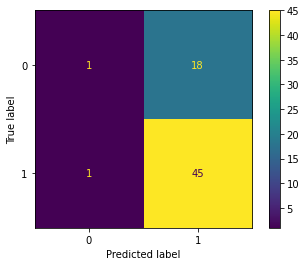

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))